In [1]:
# Cargar los datos
import pandas as pd
import numpy as np
from tsfresh import extract_features, extract_relevant_features
from tsfresh.feature_extraction import EfficientFCParameters
from tsfresh.utilities.dataframe_functions import impute
import seaborn as sns
import matplotlib.pyplot as plt


# Ruta al archivo CSV
file_path = 'C:/Users/Aldahir/Desktop/TESIS 2/data_20240825_115317.csv'
file2 = 'C:/Users/Aldahir/Desktop/TESIS 2/data_20240828_220829.csv'
file3 = 'C:\\Users\\Aldahir\\Desktop\\TESIS 2\\data_20240828_221202.csv' 
file4 = 'C:/Users/Aldahir/Desktop/TESIS 2/data_20240828_221819.csv'
file5 = 'C:\\Users\\Aldahir\\Desktop\\TESIS 2\\data_20240828_222607.csv'
# Cargar los datos
df = pd.read_csv(file_path)
df2 = pd.read_csv(file2)
df3= pd.read_csv(file3)
df5 = pd.read_csv(file4)
df6= pd.read_csv(file5)

df4 = pd.concat([df,df2,df3,df5,df6])
df4

,timestamp,x_data_1,y_data_1,z_data_1,x_data_2,y_data_2,z_data_2,current_label
0,111.207962,-2.381440,1.456680,2.412184,7.832400,-1.424960,-0.420656,0
1,119.210243,-2.381440,1.456680,2.412184,7.832400,-1.424960,-0.420656,0
2,154.717922,-2.710352,-0.657824,1.719712,7.807512,-1.539640,-0.416264,0
3,191.236019,-3.762968,-2.190144,2.147688,7.841672,-1.494744,-0.388936,0
4,219.232082,-7.144320,-4.733600,3.499936,7.818736,-1.477664,-0.398208,0
...,...,...,...,...,...,...,...,...
1658,110332.597494,-2.379488,-0.549000,10.510544,-7.930000,1.059448,-1.866112,0
1659,110476.242304,-5.621272,2.440976,-3.569720,-9.465248,-0.756888,-0.539728,0
1660,110511.786699,-8.200840,-2.321416,-1.085800,-9.465248,-0.756888,-0.539728,0
1661,110544.795036,-8.200840,-2.321416,-1.085800,-9.465248,-0.756888,-0.539728,0


In [93]:
import pandas as pd
import numpy as np
from tsfresh import extract_features

# Definir el tamaño de la ventana original
window_size = 700  # Ajusta este valor según tus necesidades

# Definir el tamaño de las subventanas
sub_window_size = 10  # Ajusta este valor según la naturaleza de tus datos

# Umbral mínimo que un comportamiento debe cumplir para ser considerado dominante
threshold = 0.7  # 70% de la ventana debe ser dominada por un comportamiento para etiquetarla con ese comportamiento

feat_list = []

for sensor in range(1, 3):  # Hay dos sensores: 1 y 2
    for axis in ['x', 'y', 'z']:  # Ejes: X, Y, Z
        column_name = f"{axis}_data_{sensor}"
        
        # Seleccionamos las columnas necesarias para este sensor y eje
        ndf = df4[['timestamp', column_name, 'current_label']]  # Incluimos 'current_label'
        
        if ndf.shape[0] > 0:
            # Dividimos los datos en ventanas originales
            windows = np.array_split(ndf, len(ndf) // window_size)
            for i in range(len(windows)):
                # Subdividir la ventana en subventanas más pequeñas
                sub_windows = np.array_split(windows[i], len(windows[i]) // sub_window_size)
                
                # Procesar cada subventana
                for sub_window in sub_windows:
                    dfe = pd.DataFrame(0, index=np.arange(len(sub_window[column_name])), columns=['id', 'time', 'value', 'label'])
                    dfe['id'] = np.ones(len(sub_window[column_name]), dtype=int)  # id siempre el mismo para cada tramo
                    dfe['time'] = list(range(len(sub_window[column_name])))  # reseteo el tiempo para cada tramo
                    dfe['value'] = sub_window[column_name].values
                    dfe['label'] = sub_window['current_label'].values  # Etiquetado
                    
                    # Contar la frecuencia de cada etiqueta en la subventana
                    label_counts = dfe['label'].value_counts(normalize=True)
                    
                    # Determinar la etiqueta dominante
                    dominant_label = label_counts.idxmax()
                    
                    # Extraer características usando tsfresh
                    extracted_features = extract_features(dfe.drop(columns=['label']), column_id="id", column_sort="time")
                    
                    # Asignar la etiqueta dominante a las características extraídas
                    extracted_features['label'] = dominant_label
                    extracted_features['sensor'] = sensor
                    extracted_features['axis'] = axis
                    
                    # Almacenar los resultados en la lista
                    feat_list.append(extracted_features)

# Combinar todos los DataFrames de la lista en uno solo
feat = pd.concat(feat_list, ignore_index=True)

# Mostrar las primeras filas del DataFrame final
print(feat.head())


C:\Users\Aldahir\Documents\ANACONDA\envs\TsFresh\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
Feature Extraction: 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]
C:\Users\Aldahir\Documents\ANACONDA\envs\TsFresh\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
Feature Extraction: 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]
C:\Users\Aldahir\Documents\ANACONDA\envs\TsFresh\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
Feature Extraction: 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]
C:\Users\Aldahir\Docum

   value__variance_larger_than_standard_deviation  value__has_duplicate_max  \
0                                             1.0                       1.0   
1                                             0.0                       1.0   
2                                             1.0                       1.0   
3                                             0.0                       0.0   
4                                             1.0                       0.0   

   value__has_duplicate_min  value__has_duplicate  value__sum_values  \
0                       0.0                   1.0         -66.162551   
1                       0.0                   1.0         -89.233728   
2                       1.0                   1.0         -54.301225   
3                       0.0                   1.0         -93.877049   
4                       0.0                   1.0        -139.705616   

   value__abs_energy  value__mean_abs_change  value__mean_change  \
0         467.322194    

In [94]:
feat


,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__query_similarity_count__query_None__threshold_0.0,value__mean_n_absolute_max__number_of_maxima_7,label,sensor,axis
0,1.0,1.0,0.0,1.0,-66.162551,467.322194,0.790609,-0.559590,0.000000,-7.142368,...,1.368922,1.906155,1.945910,1.791759,1.609438,NaN,7.846622,0,1,x
1,0.0,1.0,0.0,1.0,-89.233728,723.916707,0.040553,0.006002,-0.000678,-8.103240,...,1.522955,2.079442,1.945910,1.791759,1.609438,NaN,8.140746,0,1,x
2,1.0,1.0,1.0,1.0,-54.301225,688.421842,2.053406,0.782362,0.353068,-0.728096,...,0.348832,0.376770,0.410116,0.450561,0.500402,NaN,7.631832,0,1,x
3,0.0,0.0,0.0,1.0,-93.877049,809.797404,0.323349,0.313589,-0.131977,-8.154968,...,0.683739,1.073543,1.475076,1.791759,1.609438,NaN,8.773334,0,1,x
4,1.0,0.0,0.0,1.0,-139.705616,1864.954896,1.551938,0.046653,0.511478,-14.638048,...,1.060857,1.559581,1.747868,1.791759,1.609438,NaN,14.791698,0,1,x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4435,0.0,1.0,0.0,1.0,8.241344,12.481124,0.560658,-0.137399,0.009973,0.940376,...,1.039721,1.351784,1.329661,1.332179,1.386294,NaN,1.250395,0,2,z
4436,1.0,0.0,1.0,1.0,-0.331352,58.031905,1.723724,-0.149762,0.000000,-1.198528,...,1.494175,1.747868,1.791759,1.609438,1.386294,NaN,2.312423,0,2,z
4437,0.0,1.0,1.0,1.0,-10.607168,17.740096,0.344636,0.197044,0.000000,-0.882792,...,0.735622,1.153742,1.242453,1.332179,1.386294,NaN,1.373790,0,2,z
4438,1.0,1.0,1.0,1.0,-9.446216,29.599931,0.862838,0.092991,-0.071950,-0.149572,...,1.073543,1.475076,1.560710,1.609438,1.386294,NaN,1.592971,0,2,z


In [96]:
# reviso si la matriz tiene números infinitos. en efecto, si.
np.isfinite(feat.all())

value__variance_larger_than_standard_deviation              True
value__has_duplicate_max                                    True
value__has_duplicate_min                                    True
value__has_duplicate                                        True
value__sum_values                                           True
                                                            ... 
value__query_similarity_count__query_None__threshold_0.0    True
value__mean_n_absolute_max__number_of_maxima_7              True
label                                                       True
sensor                                                      True
axis                                                        True
Length: 786, dtype: bool

In [97]:
features=feat.dropna(axis='columns')
features

,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__lempel_ziv_complexity__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__mean_n_absolute_max__number_of_maxima_7,label,sensor,axis
0,1.0,1.0,0.0,1.0,-66.162551,467.322194,0.790609,-0.559590,0.000000,-7.142368,...,0.727273,1.368922,1.906155,1.945910,1.791759,1.609438,7.846622,0,1,x
1,0.0,1.0,0.0,1.0,-89.233728,723.916707,0.040553,0.006002,-0.000678,-8.103240,...,0.818182,1.522955,2.079442,1.945910,1.791759,1.609438,8.140746,0,1,x
2,1.0,1.0,1.0,1.0,-54.301225,688.421842,2.053406,0.782362,0.353068,-0.728096,...,0.636364,0.348832,0.376770,0.410116,0.450561,0.500402,7.631832,0,1,x
3,0.0,0.0,0.0,1.0,-93.877049,809.797404,0.323349,0.313589,-0.131977,-8.154968,...,0.636364,0.683739,1.073543,1.475076,1.791759,1.609438,8.773334,0,1,x
4,1.0,0.0,0.0,1.0,-139.705616,1864.954896,1.551938,0.046653,0.511478,-14.638048,...,0.636364,1.060857,1.559581,1.747868,1.791759,1.609438,14.791698,0,1,x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4435,0.0,1.0,0.0,1.0,8.241344,12.481124,0.560658,-0.137399,0.009973,0.940376,...,0.700000,1.039721,1.351784,1.329661,1.332179,1.386294,1.250395,0,2,z
4436,1.0,0.0,1.0,1.0,-0.331352,58.031905,1.723724,-0.149762,0.000000,-1.198528,...,0.600000,1.494175,1.747868,1.791759,1.609438,1.386294,2.312423,0,2,z
4437,0.0,1.0,1.0,1.0,-10.607168,17.740096,0.344636,0.197044,0.000000,-0.882792,...,0.700000,0.735622,1.153742,1.242453,1.332179,1.386294,1.373790,0,2,z
4438,1.0,1.0,1.0,1.0,-9.446216,29.599931,0.862838,0.092991,-0.071950,-0.149572,...,0.700000,1.073543,1.475076,1.560710,1.609438,1.386294,1.592971,0,2,z


In [98]:
# reviso si la matriz tiene números infinitos. en efecto, si.
np.isfinite(features.all())

value__variance_larger_than_standard_deviation    True
value__has_duplicate_max                          True
value__has_duplicate_min                          True
value__has_duplicate                              True
value__sum_values                                 True
                                                  ... 
value__permutation_entropy__dimension_7__tau_1    True
value__mean_n_absolute_max__number_of_maxima_7    True
label                                             True
sensor                                            True
axis                                              True
Length: 311, dtype: bool

In [99]:
features

,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__lempel_ziv_complexity__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__mean_n_absolute_max__number_of_maxima_7,label,sensor,axis
0,1.0,1.0,0.0,1.0,-66.162551,467.322194,0.790609,-0.559590,0.000000,-7.142368,...,0.727273,1.368922,1.906155,1.945910,1.791759,1.609438,7.846622,0,1,x
1,0.0,1.0,0.0,1.0,-89.233728,723.916707,0.040553,0.006002,-0.000678,-8.103240,...,0.818182,1.522955,2.079442,1.945910,1.791759,1.609438,8.140746,0,1,x
2,1.0,1.0,1.0,1.0,-54.301225,688.421842,2.053406,0.782362,0.353068,-0.728096,...,0.636364,0.348832,0.376770,0.410116,0.450561,0.500402,7.631832,0,1,x
3,0.0,0.0,0.0,1.0,-93.877049,809.797404,0.323349,0.313589,-0.131977,-8.154968,...,0.636364,0.683739,1.073543,1.475076,1.791759,1.609438,8.773334,0,1,x
4,1.0,0.0,0.0,1.0,-139.705616,1864.954896,1.551938,0.046653,0.511478,-14.638048,...,0.636364,1.060857,1.559581,1.747868,1.791759,1.609438,14.791698,0,1,x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4435,0.0,1.0,0.0,1.0,8.241344,12.481124,0.560658,-0.137399,0.009973,0.940376,...,0.700000,1.039721,1.351784,1.329661,1.332179,1.386294,1.250395,0,2,z
4436,1.0,0.0,1.0,1.0,-0.331352,58.031905,1.723724,-0.149762,0.000000,-1.198528,...,0.600000,1.494175,1.747868,1.791759,1.609438,1.386294,2.312423,0,2,z
4437,0.0,1.0,1.0,1.0,-10.607168,17.740096,0.344636,0.197044,0.000000,-0.882792,...,0.700000,0.735622,1.153742,1.242453,1.332179,1.386294,1.373790,0,2,z
4438,1.0,1.0,1.0,1.0,-9.446216,29.599931,0.862838,0.092991,-0.071950,-0.149572,...,0.700000,1.073543,1.475076,1.560710,1.609438,1.386294,1.592971,0,2,z


In [100]:
# Crear dummies para la columna 'axis' y añadirlas directamente al DataFrame 'features'
features = pd.concat([features, pd.get_dummies(features['axis'], prefix='axis')], axis=1)

# Eliminar la columna original 'axis' si ya no la necesitas
features.drop('axis', axis=1, inplace=True)

In [101]:
columns = list(features.columns)

# Paso 2: Remover 'label' de su posición actual en la lista de columnas
columns.remove('label')

# Paso 3: Agregar 'label' al final de la lista de columnas
columns.append('label')

# Paso 4: Reorganizar el DataFrame utilizando la nueva lista de columnas
features = features[columns]

# Verificar que 'label' esté ahora en la última columna
features

,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__mean_n_absolute_max__number_of_maxima_7,sensor,axis_x,axis_y,axis_z,label
0,1.0,1.0,0.0,1.0,-66.162551,467.322194,0.790609,-0.559590,0.000000,-7.142368,...,1.906155,1.945910,1.791759,1.609438,7.846622,1,True,False,False,0
1,0.0,1.0,0.0,1.0,-89.233728,723.916707,0.040553,0.006002,-0.000678,-8.103240,...,2.079442,1.945910,1.791759,1.609438,8.140746,1,True,False,False,0
2,1.0,1.0,1.0,1.0,-54.301225,688.421842,2.053406,0.782362,0.353068,-0.728096,...,0.376770,0.410116,0.450561,0.500402,7.631832,1,True,False,False,0
3,0.0,0.0,0.0,1.0,-93.877049,809.797404,0.323349,0.313589,-0.131977,-8.154968,...,1.073543,1.475076,1.791759,1.609438,8.773334,1,True,False,False,0
4,1.0,0.0,0.0,1.0,-139.705616,1864.954896,1.551938,0.046653,0.511478,-14.638048,...,1.559581,1.747868,1.791759,1.609438,14.791698,1,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4435,0.0,1.0,0.0,1.0,8.241344,12.481124,0.560658,-0.137399,0.009973,0.940376,...,1.351784,1.329661,1.332179,1.386294,1.250395,2,False,False,True,0
4436,1.0,0.0,1.0,1.0,-0.331352,58.031905,1.723724,-0.149762,0.000000,-1.198528,...,1.747868,1.791759,1.609438,1.386294,2.312423,2,False,False,True,0
4437,0.0,1.0,1.0,1.0,-10.607168,17.740096,0.344636,0.197044,0.000000,-0.882792,...,1.153742,1.242453,1.332179,1.386294,1.373790,2,False,False,True,0
4438,1.0,1.0,1.0,1.0,-9.446216,29.599931,0.862838,0.092991,-0.071950,-0.149572,...,1.475076,1.560710,1.609438,1.386294,1.592971,2,False,False,True,0


In [102]:
from sklearn.preprocessing import MinMaxScaler
from numpy import inf
X = features.iloc[:,:-5]
X[X == inf] = np.finfo(np.float64).max
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(X) 
features.iloc[:,:-5] = scaled_values
features

,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__mean_n_absolute_max__number_of_maxima_7,sensor,axis_x,axis_y,axis_z,label
0,1.0,1.0,0.0,0.0,0.268640,0.250580,0.088608,0.363064,0.448973,0.266736,...,0.916667,1.000000,1.000000,1.000000,0.529998,1,True,False,False,0
1,0.0,1.0,0.0,0.0,0.184365,0.388168,0.004545,0.482326,0.448765,0.232543,...,1.000000,1.000000,1.000000,1.000000,0.549903,1,True,False,False,0
2,1.0,1.0,1.0,0.0,0.311967,0.369135,0.230136,0.646031,0.557465,0.494990,...,0.181188,0.210758,0.251463,0.310918,0.515463,1,True,False,False,0
3,0.0,0.0,0.0,0.0,0.167404,0.434217,0.036239,0.547185,0.408419,0.230702,...,0.516265,0.758039,1.000000,1.000000,0.592713,1,True,False,False,0
4,1.0,0.0,0.0,0.0,0.000000,1.000000,0.173933,0.490898,0.606142,0.000000,...,0.750000,0.898227,1.000000,1.000000,1.000000,1,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4435,0.0,1.0,0.0,0.0,0.540424,0.006691,0.062836,0.452088,0.452038,0.554363,...,0.650071,0.683311,0.743503,0.861353,0.083605,2,False,False,True,0
4436,1.0,0.0,1.0,0.0,0.509110,0.031116,0.193187,0.449481,0.448973,0.478250,...,0.840547,0.920782,0.898244,0.861353,0.155477,2,False,False,True,0
4437,0.0,1.0,1.0,0.0,0.471574,0.009511,0.038625,0.522610,0.448973,0.489485,...,0.554833,0.638495,0.743503,0.861353,0.091956,2,False,False,True,0
4438,1.0,1.0,1.0,0.0,0.475815,0.015870,0.096703,0.500669,0.426864,0.515577,...,0.709362,0.802046,0.898244,0.861353,0.106789,2,False,False,True,0


In [103]:
features

,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__mean_n_absolute_max__number_of_maxima_7,sensor,axis_x,axis_y,axis_z,label
0,1.0,1.0,0.0,0.0,0.268640,0.250580,0.088608,0.363064,0.448973,0.266736,...,0.916667,1.000000,1.000000,1.000000,0.529998,1,True,False,False,0
1,0.0,1.0,0.0,0.0,0.184365,0.388168,0.004545,0.482326,0.448765,0.232543,...,1.000000,1.000000,1.000000,1.000000,0.549903,1,True,False,False,0
2,1.0,1.0,1.0,0.0,0.311967,0.369135,0.230136,0.646031,0.557465,0.494990,...,0.181188,0.210758,0.251463,0.310918,0.515463,1,True,False,False,0
3,0.0,0.0,0.0,0.0,0.167404,0.434217,0.036239,0.547185,0.408419,0.230702,...,0.516265,0.758039,1.000000,1.000000,0.592713,1,True,False,False,0
4,1.0,0.0,0.0,0.0,0.000000,1.000000,0.173933,0.490898,0.606142,0.000000,...,0.750000,0.898227,1.000000,1.000000,1.000000,1,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4435,0.0,1.0,0.0,0.0,0.540424,0.006691,0.062836,0.452088,0.452038,0.554363,...,0.650071,0.683311,0.743503,0.861353,0.083605,2,False,False,True,0
4436,1.0,0.0,1.0,0.0,0.509110,0.031116,0.193187,0.449481,0.448973,0.478250,...,0.840547,0.920782,0.898244,0.861353,0.155477,2,False,False,True,0
4437,0.0,1.0,1.0,0.0,0.471574,0.009511,0.038625,0.522610,0.448973,0.489485,...,0.554833,0.638495,0.743503,0.861353,0.091956,2,False,False,True,0
4438,1.0,1.0,1.0,0.0,0.475815,0.015870,0.096703,0.500669,0.426864,0.515577,...,0.709362,0.802046,0.898244,0.861353,0.106789,2,False,False,True,0


Importancia de las características:
 value__variance_larger_than_standard_deviation    0.015207
value__has_duplicate_max                          0.002852
value__has_duplicate_min                          0.002971
value__has_duplicate                              0.000000
value__sum_values                                 0.002992
                                                    ...   
value__mean_n_absolute_max__number_of_maxima_7    0.003821
sensor                                            0.005372
axis_x                                            0.000710
axis_y                                            0.003043
axis_z                                            0.002983
Length: 312, dtype: float64


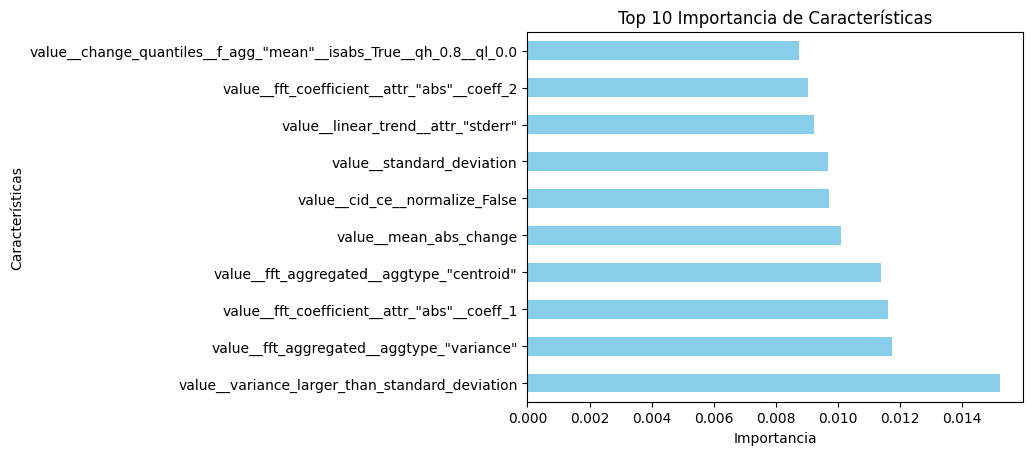

In [104]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame 'features'
# Asegúrate de que 'features' es un DataFrame
if 'features' in locals() or 'features' in globals():
    if not isinstance(features, pd.DataFrame):
        features = pd.DataFrame(features)
    
    # Verificar si 'label' existe antes de proceder
    if 'label' in features.columns:
        # Convertir `label` a categorías discretas si es necesario
        if pd.api.types.is_numeric_dtype(features['label']):
            features['label'] = pd.cut(features['label'], bins=[-np.inf, 0, 1, np.inf], labels=[0, 1, 2])

        # Separar las características (X) y las etiquetas (y)
        X = features.drop(columns=['label'])
        y = features['label']

        # Imputar valores faltantes si existen
        imputer = SimpleImputer(strategy='mean')
        X_imputed = imputer.fit_transform(X)
        
        # Inicializar y entrenar el modelo
        model = ExtraTreesClassifier(random_state=42)
        model.fit(X_imputed, y)

        # Mostrar las importancias de las características
        feat_importances = pd.Series(model.feature_importances_, index=X.columns)
        print("Importancia de las características:\n", feat_importances)

        # Graficar las 10 características más importantes
        feat_importances.nlargest(10).plot(kind='barh', color='skyblue')
        plt.title("Top 10 Importancia de Características")
        plt.xlabel("Importancia")
        plt.ylabel("Características")
        plt.show()
    else:
        print("Error: La columna 'label' no existe en el DataFrame.")
else:
    print("Error: La variable 'features' no está definida.")


In [105]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm

In [106]:
#seleccionamos los 50 mas mejores
featimp=feat_importances.nlargest(50)
xdata_train=features[featimp.index]
ydata_train=features['label']
xdata_train
# ydata_train es el mismo

,value__variance_larger_than_standard_deviation,"value__fft_aggregated__aggtype_""variance""","value__fft_coefficient__attr_""abs""__coeff_1","value__fft_aggregated__aggtype_""centroid""",value__mean_abs_change,value__cid_ce__normalize_False,value__standard_deviation,"value__linear_trend__attr_""stderr""","value__fft_coefficient__attr_""abs""__coeff_2","value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.0",...,value__approximate_entropy__m_2__r_0.7,"value__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.0",value__energy_ratio_by_chunks__num_segments_10__segment_focus_4,"value__fft_coefficient__attr_""imag""__coeff_4","value__linear_trend__attr_""slope""","value__fft_coefficient__attr_""real""__coeff_1",value__approximate_entropy__m_2__r_0.5,value__variation_coefficient,"value__fft_coefficient__attr_""imag""__coeff_3","value__change_quantiles__f_agg_""var""__isabs_False__qh_1.0__ql_0.0"
0,1.0,0.349730,0.289711,0.191030,0.088608,0.098975,0.220262,0.085725,0.126331,0.142346,...,0.552099,0.398778,0.121685,0.459436,0.355600,0.632270,0.738291,0.598625,0.399883,0.007277
1,0.0,0.017797,0.004967,0.007129,0.004545,0.004921,0.005201,0.004532,0.005349,0.006949,...,0.353232,0.507529,0.101574,0.507636,0.502899,0.536685,0.072623,0.598664,0.413232,0.000022
2,1.0,0.487430,0.688012,0.354534,0.230136,0.358860,0.542213,0.299081,0.423130,0.308605,...,0.269600,0.635662,0.000858,0.608732,0.816122,0.326084,0.302364,0.598545,0.370968,0.113660
3,0.0,0.301369,0.065030,0.114789,0.036239,0.060298,0.077665,0.051737,0.064190,0.052871,...,0.078379,0.563086,0.091644,0.503841,0.540092,0.498288,0.087904,0.598655,0.424380,0.002793
4,1.0,0.319147,0.302404,0.150485,0.173933,0.217864,0.251753,0.211609,0.191768,0.118593,...,0.095110,0.415357,0.128076,0.662163,0.451613,0.702921,0.106668,0.598643,0.467098,0.043039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4435,0.0,0.798333,0.033912,0.514041,0.062836,0.074414,0.066157,0.057525,0.076252,0.084261,...,0.433384,0.484436,0.078980,0.544595,0.474247,0.550570,0.486051,0.598752,0.397950,0.005483
4436,1.0,0.515414,0.213600,0.748249,0.193187,0.215581,0.211274,0.215130,0.095475,0.084866,...,0.603027,0.414182,0.665108,0.622073,0.492678,0.416703,0.323503,0.591718,0.312988,0.046721
4437,0.0,0.369094,0.077468,0.276371,0.038625,0.045368,0.070654,0.050506,0.029175,0.038920,...,0.409149,0.549606,0.061909,0.518705,0.544010,0.494499,0.458871,0.598592,0.454326,0.001875
4438,1.0,0.630492,0.130887,0.438069,0.096703,0.104280,0.126123,0.128454,0.117399,0.147110,...,0.646237,0.518729,0.358675,0.518645,0.497111,0.607425,0.586065,0.598519,0.409069,0.010914


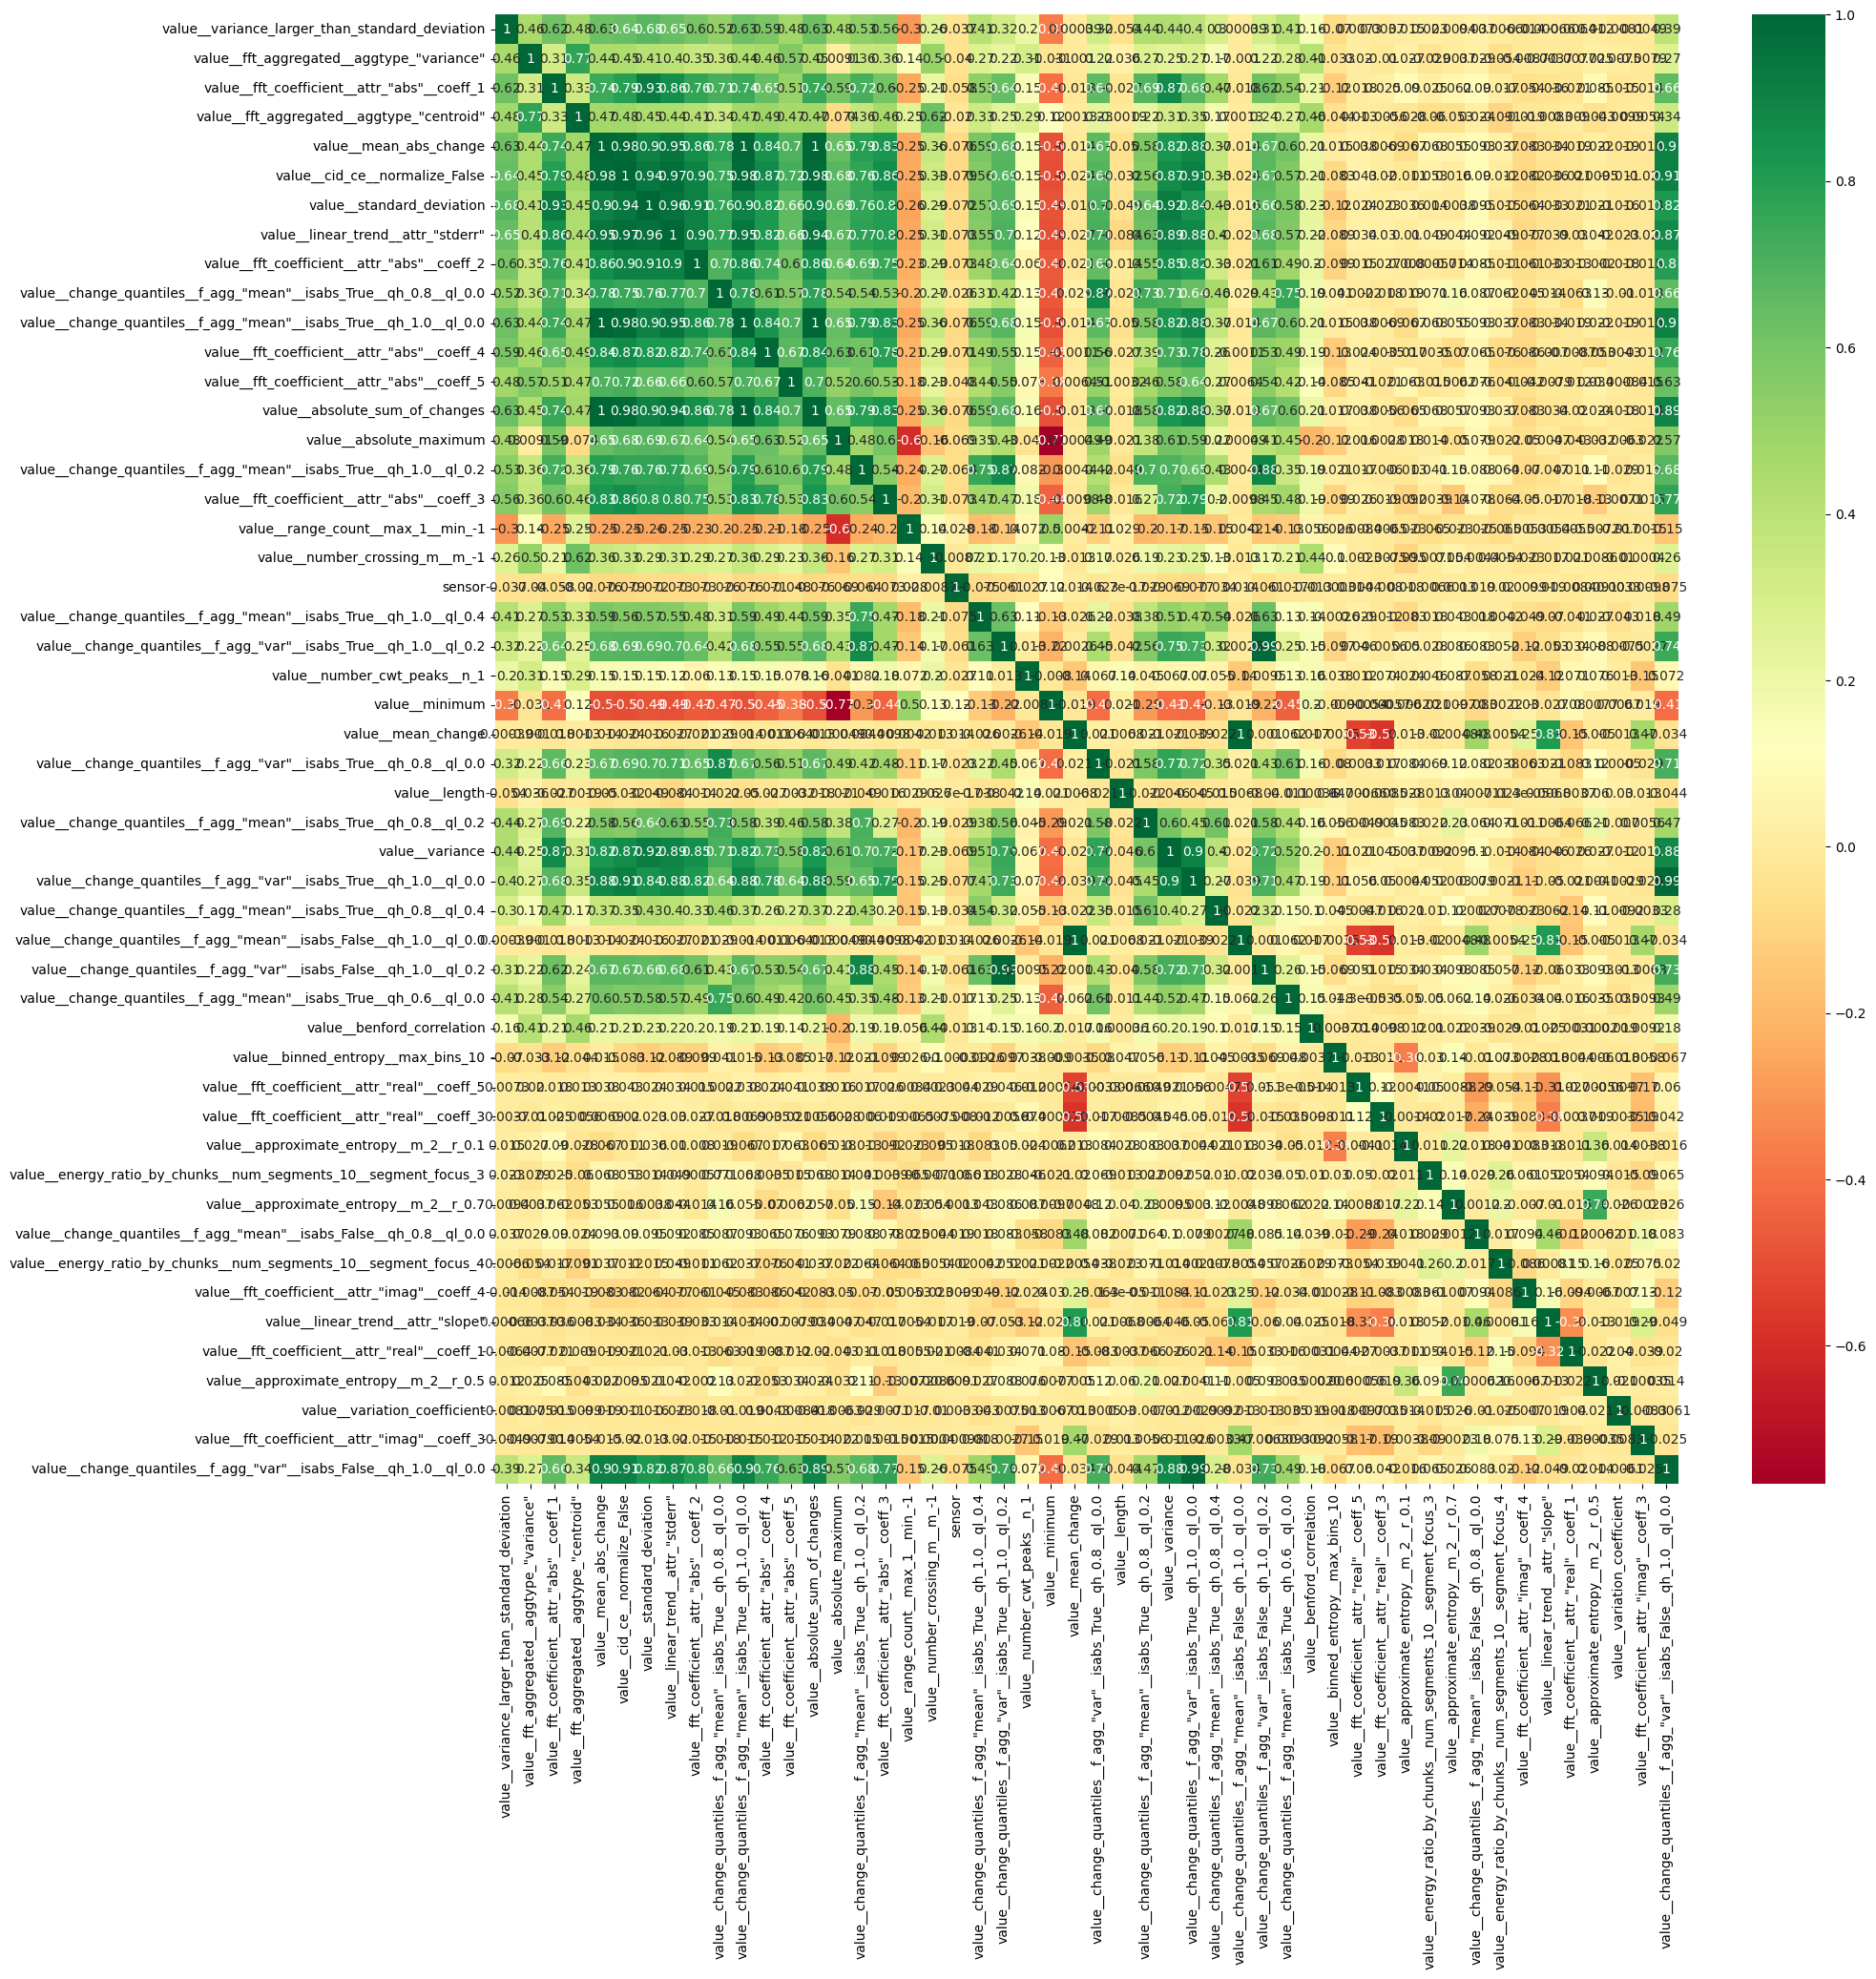

In [107]:
corrmat = xdata_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(features[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [108]:
featimp.index

Index(['value__variance_larger_than_standard_deviation',
       'value__fft_aggregated__aggtype_"variance"',
       'value__fft_coefficient__attr_"abs"__coeff_1',
       'value__fft_aggregated__aggtype_"centroid"', 'value__mean_abs_change',
       'value__cid_ce__normalize_False', 'value__standard_deviation',
       'value__linear_trend__attr_"stderr"',
       'value__fft_coefficient__attr_"abs"__coeff_2',
       'value__change_quantiles__f_agg_"mean"__isabs_True__qh_0.8__ql_0.0',
       'value__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.0',
       'value__fft_coefficient__attr_"abs"__coeff_4',
       'value__fft_coefficient__attr_"abs"__coeff_5',
       'value__absolute_sum_of_changes', 'value__absolute_maximum',
       'value__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.2',
       'value__fft_coefficient__attr_"abs"__coeff_3',
       'value__range_count__max_1__min_-1', 'value__number_crossing_m__m_-1',
       'sensor',
       'value__change_quantiles__f_ag

In [109]:
# Selecciona la matriz superior (por encima de la diagonal)
threshold = 0.8
upper = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(bool))

# Identifica las características a eliminar
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Elimina las características altamente correlacionadas
X_reduced = X.drop(columns=to_drop)

In [110]:
xdata_train=X_reduced

In [111]:
xdata_train

,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__mean_n_absolute_max__number_of_maxima_7,sensor,axis_x,axis_y,axis_z
0,1.0,1.0,0.0,0.0,0.268640,0.250580,0.088608,0.363064,0.448973,0.266736,...,0.788947,0.916667,1.000000,1.000000,1.000000,0.529998,1,True,False,False
1,0.0,1.0,0.0,0.0,0.184365,0.388168,0.004545,0.482326,0.448765,0.232543,...,0.877720,1.000000,1.000000,1.000000,1.000000,0.549903,1,True,False,False
2,1.0,1.0,1.0,0.0,0.311967,0.369135,0.230136,0.646031,0.557465,0.494990,...,0.201041,0.181188,0.210758,0.251463,0.310918,0.515463,1,True,False,False
3,0.0,0.0,0.0,0.0,0.167404,0.434217,0.036239,0.547185,0.408419,0.230702,...,0.394057,0.516265,0.758039,1.000000,1.000000,0.592713,1,True,False,False
4,1.0,0.0,0.0,0.0,0.000000,1.000000,0.173933,0.490898,0.606142,0.000000,...,0.611400,0.750000,0.898227,1.000000,1.000000,1.000000,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4435,0.0,1.0,0.0,0.0,0.540424,0.006691,0.062836,0.452088,0.452038,0.554363,...,0.599219,0.650071,0.683311,0.743503,0.861353,0.083605,2,False,False,True
4436,1.0,0.0,1.0,0.0,0.509110,0.031116,0.193187,0.449481,0.448973,0.478250,...,0.861133,0.840547,0.920782,0.898244,0.861353,0.155477,2,False,False,True
4437,0.0,1.0,1.0,0.0,0.471574,0.009511,0.038625,0.522610,0.448973,0.489485,...,0.423959,0.554833,0.638495,0.743503,0.861353,0.091956,2,False,False,True
4438,1.0,1.0,1.0,0.0,0.475815,0.015870,0.096703,0.500669,0.426864,0.515577,...,0.618712,0.709362,0.802046,0.898244,0.861353,0.106789,2,False,False,True


In [122]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Retiene el 95% de la varianza
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [123]:
ydata_train

0       0
1       0
2       0
3       0
4       0
       ..
4435    0
4436    0
4437    0
4438    0
4439    0
Name: label, Length: 4440, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [140]:
X_train, X_test, Y_train, Y_test = train_test_split(xdata_train, ydata_train, test_size=0.3, shuffle=False)


In [141]:
# SVM
from sklearn import svm
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
rbf = svm.SVC(kernel='rbf', gamma=1, C=0.001).fit(X_train, Y_train)
poly = svm.SVC(kernel='poly', degree=4, C=0.001).fit(X_train, Y_train)

poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

poly_accuracy = accuracy_score(Y_test, poly_pred)
poly_f1 = f1_score(Y_test, poly_pred, average='weighted')

print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy * 100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1 * 100))


Accuracy (Polynomial Kernel):  70.95
F1 (Polynomial Kernel):  58.89


In [142]:
# KNN
knn=KNeighborsClassifier(n_neighbors= 30)
scores = np.mean(cross_val_score(knn,  X_train, Y_train, scoring='accuracy'))
#Train the model using the training sets
knn.fit(X_train, Y_train)
#p_scores = np.mean(cross_val_score(knn,  X_train, Y_train, scoring='precision'))
#r_scores = np.mean(cross_val_score(knn,  X_train, Y_train, scoring='recall'))
print("Accuracy: %s" % '{:.2%}'.format(scores))

Accuracy: 69.88%


In [143]:
# Random Forest Classifier
rf=RandomForestClassifier(random_state=21)
score_rf = np.mean(cross_val_score(rf,  X_train, Y_train, scoring='accuracy'))
rf.fit(X_train, Y_train)
#p_score_rf = np.mean(cross_val_score(rf,  X_train, Y_train, scoring='precision'))
#r_score_rf = np.mean(cross_val_score(rf,  X_train, Y_train, scoring='recall'))
print("Accuracy for RandomForest: %s" % '{:.2%}'.format(score_rf))

Accuracy for RandomForest: 74.42%


In [145]:
# Make predictions for the random forest test set in order to check overfitting.
y_pred_test = rf.predict(X_test)
# View accuracy score
accuracy_score(Y_test, y_pred_test)

0.725975975975976

In [146]:
np.unique(Y_test)

array([0, 1, 2], dtype=int64)

Matriz de Confusión:
 [[896   8  41]
 [233   6   7]
 [ 73   3  65]]


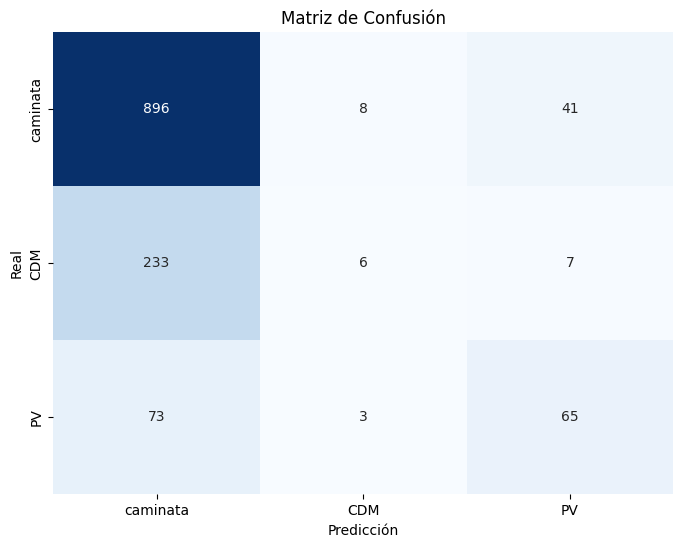

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predecir las etiquetas de los ejemplos en el conjunto de prueba
predicted_labels = rf.predict(X_test)

# Construir la matriz de confusión para un problema de clasificación de 3 clases
cnf_matrix = confusion_matrix(Y_test, predicted_labels)
print("Matriz de Confusión:\n", cnf_matrix)

# Graficar la matriz de confusión utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['caminata', 'CDM', 'PV'],  # Ajusta según tus clases reales
            yticklabels=['caminata', 'CDM', 'PV'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


In [120]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# View the classification report for test data and predictions
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84       793
           1       0.21      0.02      0.03       194
           2       0.62      0.51      0.56       123

    accuracy                           0.74      1110
   macro avg       0.53      0.49      0.48      1110
weighted avg       0.65      0.74      0.67      1110



In [121]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una matriz de confusión personalizada con los valores que desees
cnf_matrix_custom = np.array([[[84,  2,  3],
                               [9,  24,  1],
                               [ 3,  1, 20]])

# Graficar la matriz de confusión personalizada
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix_custom, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['caminata', 'CDM', 'PV'],  
            yticklabels=['caminata', 'CDM', 'PV'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión Personalizada')
plt.show()

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' on line 6 (525965499.py, line 8)